# **General Pandas Introduction**

## **Lesson 1**  

**Create Data** - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.  
**Get Data** - We will learn how to read in the text file. The data consist of baby names and the number of baby names born in the year 1880.  
**Prepare Data** - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.  
**Analyze Data** - We will simply find the most popular name in a specific year.  
**Present Data** - Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.       
    

The ***pandas*** library is used for all the data analysis excluding a small piece of the data presentation section. The ***matplotlib*** library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.

In [ ]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #only needed to determine version number

# Enable inline plotting
%matplotlib inline

In [ ]:
print('Pandas version ' + pd.__version__)

Pandas version 1.3.5


# Create Data  

The data set will consist of 5 baby names and the number of births recorded for that year (1880).

In [ ]:
# The initial set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

To merge these two lists together we will use the ***zip*** function.

In [ ]:
BabyDataSet = list(zip(names,births))
print(BabyDataSet)

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


We are basically done creating the data set. We now will use the ***pandas*** library to export this data set into a csv file. 

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [ ]:
df = DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


The following method will  export the dataframe to a ***csv*** file. 

```
df.to_csv(self, path_or_buf, sep=',', na_rep='', float_format=None,
          cols=None, header=True, index=True, index_label=None, 
          mode='w', nanRep=None, encoding=None, quoting=None, 
          line_terminator='\n')
```

The only parameters we will use is ***index*** and ***header***. Setting these parameters to `False` will prevent the index and header names from being saved. Change the values of these parameters to get a better understanding of their use.

We can name the new file ***births_example.csv***. 

In [ ]:
from google.colab import drive
import os.path
# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
data_dir ='/content/gdrive/My Drive/'
file_path = os.path.join(data_dir, 'births_example.csv')
df.to_csv(file_path,index=False,header=False)
#df.to_csv('births_example.csv',index=False,header=False)

Mounted at /content/gdrive


NameError: ignored

## Get Data

To read back the text file we just created, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes.  

```
read_csv(filepath_or_buffer, 
         dialect=None, compression=None, doublequote=True, 
         escapechar=None, quotechar='"',quoting=0,        
         skipinitialspace=False, lineterminator=None,
         header='infer', index_col=None, names=None,       
         skiprows=None, skipfooter=None, skip_footer=0, 
         na_values=None, true_values=None, false_values=None, 
         delimiter=None, converters=None, dtype=None, 
         usecols=None, engine='c', delim_whitespace=False,     
         as_recarray=False, na_filter=True, compact_ints=False, 
         use_unsigned=False, low_memory=True, buffer_lines=None, 
         warn_bad_lines=True, error_bad_lines=True, 
         keep_default_na=True, thousands=None, 
         comment=None, decimal='.', parse_dates=False, 
         keep_date_col=False, dayfirst=False, date_parser=None, 
         memory_map=False, nrows=None, iterator=False, 
         chunksize=None, verbose=False, encoding=None, 
         squeeze=False)
```

As you can see, there are many options as to how you read a file in, or
how much of it you read in or what you Python/pandas types you convert the data into on reading.
More information about the `read_csv` function in `pandas` can be found by executing

```
read_csv?
```

Even though this functions has many parameters, only one is obliatory. We will simply pass in that obligatory argument, which specifies the location of the text file.  All the other function parameters will be set to their default values.  As an example, the following is a string is an **example** (full path) file location string on
a Windows machine.

```
file_path = '/content/gdrive/My Drive/births_example.csv'
```
Notice the ***r*** before the string. Since the slashes are special characters, prefixing the string with a ***r*** will escape the whole string.  That is, it will keep the slashes from getting their usual special-character interpretation.

***Note:*** Depending on where you save your notebooks, you may need to modify the location above.  

The next cell assumes you have placed `births_example.csv` in the same directory as your notebook.  We use an IPython magic command to look at the contents of the file.  On a Unix machine, use 

```
%cat /content/gdrive/My\ Drive/births_example.csv
```

On a Windows machine, the above may not work, and you may need to do

```
%cat /content/gdrive/My\ Drive/births_example.csv
```

Apparently, some Windows versions (Windows 10?) no longer support the magic command above. 

In [ ]:
%cat /content/gdrive/My\ Drive/births_example.csv

Bob,968
Jessica,155
Mary,77
John,578
Mel,973


What we have is a toy example of some names data, 5 names and their counts, with no information about the names of the columns.  The file is in **csv** format; each line is a data item, with column information separated by commas.  We will read this in using the `pandas` `read_csv` function, which reads a CSV file into a `DataFrame`.

In [ ]:
import os.path
df =pd.read_csv(file_path)

In [ ]:
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Bob     4 non-null      object
 1   968     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


This brings us the our first problem of the exercise. The ***read_csv*** function treated the first record in the text file as column names (or **headers**). This is obviously not correct since the text file did not provide us with column names.  

To correct this we will pass the ***header*** parameter to the *read_csv* function and set it to ***None*** (means null in python).

In [ ]:
df = read_csv(file_path, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


The column names now shown are arbitrary default choices, the integers  0 and 1.  If we wanted to give the columns specific names, we would have to pass another parameter called ***names***. We can also omit the *header* parameter.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      object
 1   1       5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
df = read_csv(file_path, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


We can use Boolean conditions on columns (`pandas` Series objects) much as we did on `numpy` arrays. The result is a `Boolean Series` we can use as a mask, just as we did with arrays.

In [ ]:
df['Births'] > 500

0     True
1    False
2    False
3     True
4     True
Name: Births, dtype: bool

In [ ]:
df[df['Births'] > 500]

,Names,Births
0,Bob,968
3,John,578
4,Mel,973


In [ ]:
df[df['Births'] < 900]

,Names,Births
1,Jessica,155
2,Mary,77
3,John,578


We can also use bitwise "and".  Conceptually this has the same meaning as Python `and`, but it works on Boolean arrays and performs an elementwise `&` on two arrays of the same size, producing an array that has `True` wherever both the input arrays have `True`, and `False` elsewhere.  In `pandas`, where the Boolean arrays represent conditions defining sets of rows, the `&` finds the rows that satisfy **both** conditions.

In [ ]:
df[(df['Births'] > 500) & (df['Births'] < 900)]

,Names,Births
3,John,578


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
Names     5 non-null object
Births    5 non-null int64
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the ***index*** of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.  

[Names, Births] can be thought of as column headers similar to the ones found in an Excel spreadsheet or sql database.

The data type `object` seen  in the above info priontout is the data type `pandas` assigns to string columns, so this is what we expect for the column labeled `Names`, a coulmn of strings.  Similarly, the column labeled `Births` is a column of name counts, so we expect `integer` to be the type and it is.  The main surprise we may sometimes get with read-in data is that the type of one column is not numerical when it should be, or does not represent dates or times when it should.  We do not address these issues here.

## Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.  

* Sort the dataframe and select the top row
* Use the ***max()*** attribute to find the maximum value

First we sort a column (Series).

In [ ]:
print(df['Births'])
Sorted = df['Births'].sort_values(ascending=False)
print(Sorted)

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64
4    973
0    968
3    578
1    155
2     77
Name: Births, dtype: int64


Next we create a new dataframe, sorting the rows according to values in a particular column.

In [ ]:
# Method 1 (old pandas)
Sorted_df = df.sort_values(['Births'], ascending= False)
print(Sorted_df)

     Names  Births
4      Mel     973
0      Bob     968
3     John     578
1  Jessica     155
2     Mary      77


Just show the most popular name,

In [ ]:
Sorted_df.head(1)

,Names,Births
4,Mel,973


Of course if all we were interested in was the count of the most popular name, we could do:

In [ ]:
# Method 2:
df['Births'].max()

973

## Present Data

We learned how to find the maximum value of the Births column in the previous section. But that did not display the name that has that count (Mel). We also learned how to sort the data frame, which gives us both count of the most popular name and the name itself, because we get a sorted version of the entire data frame. Selecting the top row or (**record**) gives us the name and its count.  We could also find the top 10 most popular names, and so on, so it's a more informative (and more computationally expensive) way of processing the data.

Let's now look at a still more powerful device, one that lets us select  data records using almost any condition, as well as any column (`Series`) filtered by such a condition.  We'll build up an expression finding the most popular name, piece by piece.  

**Explain the pieces:** 

1. *df['Names']* - This is the entire Names column. It is a pandas `Series`. 
2. *df['Births']* - This is the entire `Births` column, another `Series`.  
3. *df['Births'].max()* - This is the maximum value found in the Births column.  
4. df['Births'] == df['Births'].max() **Returns** [A Boolean 
    Series, `True` for all records such that the Births column
    equals 973, `False` elsewhere]  
5. df['Names'][df['Births'] == df['Births'].max()] **Returns** [A Series containing only the names in the Names column **WHERE** [The Births column is equal to 973]  

Note the difference between

```
df[df['Births'] == df['Births'].max()]
```

and 

```
df['Names'][df['Births'] == df['Births'].max()]
```

We discuss the uses of `Series` in column selection in more detail in the section on Selection.

The former returns the records with the count of the most popular name; it is a `DataFrame`.  The latter returns the names with the count of the most popular name.  It is a `Series`.

In [ ]:
df['Births'] == df['Births'].max() 

0    False
1    False
2    False
3    False
4     True
Name: Births, dtype: bool

So to get the row for the most popular name in one step, we do:

Next we plot the ***Births*** column and label the graph to show the end user the highest point on the graph, using the code we just explained to find the most popular name and its count.

***plot()*** is a convenient attribute where pandas lets you painlessly plot the data in your dataframe.

The most popular name


,Names,Births
4,Mel,973


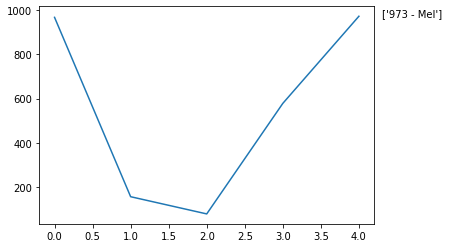

In [ ]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), 
             textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

In [ ]:
df[df['Births'] == df['Births'].max()]

,Names,Births
4,Mel,973


**Author:** [David Rojas LLC](http://hdrojas.pythonanywhere.com/)  

##. Loading the Baby names data onto your Google Drive

First we specify the github URL, tweak it for **raw** data download (as opposed to browser- and display- oriented file serving), and 

In [ ]:
import urllib.request
import tarfile
import os.path

##. Where the data is on github
base = 'baby_names'
fn = f'{base}.tar.gz'
# The usual URL you visit with your browser
url = f'https://github.com/gawron/python-for-social-science/blob/master/pandas/{fn}'
# The download URL for downloading raw data.
thetarfile = url.replace('github','raw.githubusercontent')
thetarfile = thetarfile.replace('blob/','')

We prepare a `data_dir` folder on our google drive to save it in (lines 1-10)

We connect to `data_dir` to make untarring easier. (Line 11)

Finally we extract the data from the tar archive on github Because we are conected to `data)_dir`, the files are extracted into `data_dir` (lines 13-17).

In [ ]:
# Prepare a home for extracted data files on your Gdrive
# Change this if you want to run this as a jupyter NB
# and store the data on your local disk drive.
working_dir = '/content/gdrive/My Drive/'
data_dir = os.path.join(working_dir,'data')
try:
  # create directory if necessary
  os.makedirs(data_dir)
except:
  pass
os.chdir(data_dir)

#  When we extract we will extract into data_dir
# This may take a few minutes!
with urllib.request.urlopen(thetarfile) as tarhandle:
  # creates a TarFile inst, note weird mode for unzipping on remote stream
  thetarstream = tarfile.open(fileobj=tarhandle, mode="r|gz")
  # Extract all files into current directory
  thetarstream.extractall()

In [ ]:
data_dir

'/content/gdrive/My Drive/data'

In [ ]:
!ls /content/gdrive/My\ Drive/data

BicycleWeather.csv     names		      state-abbrevs.csv
births.csv	       president_heights.csv  state-areas.csv
california_cities.csv  Seattle2014.csv	      state-population.csv


The unzipped files (a whole bunch of them) now reside in `data_dir` on my Gdrive.

The next code cell assumes you are still connected to`data_dir`, where the extraction happened.

The `tar` extraction put all teh babynames files into a subdirectory of `data_dir` named `names`.

In [ ]:
import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

We first build the list `pieces` in the `for`-loop; `pieces` is a list of frames.  We then concatenate that list into a single large frame called `names`, ignoring the indexes in the old frames.  We ignore the indexes because they will just be record numbers, and rather than have a large number of records indexed `1` (1 from each year), we renumber them all.

Think about why it's hard to build the list `pieces` with a list comprehension instead of  the way it's done in the above cell.
Notice the following doesn't work.  Python requires an expression
as the first component of a list comprehension.  One reason for this is that list comprehensions are supposed to improve readability.  Complex sequences of commands don't do that, and the `for`-loop above is much more understandable.

```
pieces = [f=pd.read_csv('names/yob{0:d}.txt'.format(year),names=columns);
          f['year']=year; f
          for year in years]
```

In [ ]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## Selection: Selecting parts of Pandas data frames

We create a Pandas data frame with babynames data.  We focus on how to select data.   For much more detailed background on Pandas data structures, see http://pandas.pydata.org/pandas-docs/dev/dsintro.html.

Let's cook up a bunch of 3 letter codes to label some data with.  The choice is fairly arbitrary.
We're just going to use them to label some data.

In [ ]:
from string import ascii_lowercase
codes = [x + y + z for x in ascii_lowercase for y in ascii_lowercase for z in ascii_lowercase]

In [ ]:
print(ascii_lowercase)
codes[:50]

abcdefghijklmnopqrstuvwxyz


['aaa',
 'aab',
 'aac',
 'aad',
 'aae',
 'aaf',
 'aag',
 'aah',
 'aai',
 'aaj',
 'aak',
 'aal',
 'aam',
 'aan',
 'aao',
 'aap',
 'aaq',
 'aar',
 'aas',
 'aat',
 'aau',
 'aav',
 'aaw',
 'aax',
 'aay',
 'aaz',
 'aba',
 'abb',
 'abc',
 'abd',
 'abe',
 'abf',
 'abg',
 'abh',
 'abi',
 'abj',
 'abk',
 'abl',
 'abm',
 'abn',
 'abo',
 'abp',
 'abq',
 'abr',
 'abs',
 'abt',
 'abu',
 'abv',
 'abw',
 'abx']

In [ ]:
L = os.listdir('names')
'yob1881.txt' in L

True

Note: The code below assumes you have executed the cells above which load the baby names data onto your Google Drive.

In [ ]:
import pandas as pd
year = 1881
names1881 = pd.read_csv('names/yob1881.txt',names=['name','sex','births'])
print(f"There are {len(names1881)} names in the {year} data ")
names1881

There are 1935 names in the 1881 data 


,name,sex,births
0,Mary,F,6919
1,Anna,F,2698
2,Emma,F,2034
3,Elizabeth,F,1852
4,Margaret,F,1658
...,...,...,...
1930,Wiliam,M,5
1931,Wilton,M,5
1932,Wing,M,5
1933,Wood,M,5


Notice the rows are indexed with numbers.  We could if we wished assign an arbitrary set of code names to the rows,
and sequence of strings of the right length.  Here's a silly choice.

In [ ]:
from string import ascii_lowercase
codes = [x + y + z for x in ascii_lowercase for y in ascii_lowercase for z in ascii_lowercase]
names1881.index = codes[:1935]

In [ ]:
names1881

,name,sex,births
aaa,Mary,F,6919
aab,Anna,F,2698
aac,Emma,F,2034
aad,Elizabeth,F,1852
aae,Margaret,F,1658
...,...,...,...
cwg,Wiliam,M,5
cwh,Wilton,M,5
cwi,Wing,M,5
cwj,Wood,M,5


The first ten rows.  Note the type is still a data frame, just a smaller one.

In [ ]:
print(type(names1881[:10]))
names1881[:10]

<class 'pandas.core.frame.DataFrame'>


,name,sex,births
aaa,Mary,F,6919
aab,Anna,F,2698
aac,Emma,F,2034
aad,Elizabeth,F,1852
aae,Margaret,F,1658
aaf,Minnie,F,1653
aag,Ida,F,1439
aah,Annie,F,1326
aai,Bertha,F,1324
aaj,Alice,F,1308


Retrieve the gender column, and display the last part.

In [ ]:
names1881['sex'].tail()

cwg    M
cwh    M
cwi    M
cwj    M
cwk    M
Name: sex, dtype: object

A Boolean test, returning a DataFrame that has one column, a column of Booleans.

In [ ]:
print(type(names1881['sex']=='F'))
names1881['sex']=='F'

<class 'pandas.core.series.Series'>


aaa     True
aab     True
aac     True
aad     True
aae     True
       ...  
cwg    False
cwh    False
cwi    False
cwj    False
cwk    False
Name: sex, Length: 1935, dtype: bool

You can pick out a subdata frame with only two columns.

In [ ]:
import numpy as np
X = np.arange(7)
print(X)
print(X[[0,2,4,6]])
print(X[[0]])
print(X[0])

[0 1 2 3 4 5 6]
[0 2 4 6]
[0]
0


In [ ]:
print(type(names1881[['sex','births']]))
names1881[['sex','births']]

<class 'pandas.core.frame.DataFrame'>


,sex,births
aaa,F,6919
aab,F,2698
aac,F,2034
aad,F,1852
aae,F,1658
...,...,...
cwg,M,5
cwh,M,5
cwi,M,5
cwj,M,5


You can leave out one pair of square brackets to get another type of Pandas object called a Series.  A series is halfway from an array to a dataframe, basically an labeled array with one data type.  Notice the row names (or index) of the orginal data frame is preserved.

In [ ]:
print(type(names1881['sex']))
names1881['sex']

<class 'pandas.core.series.Series'>


aaa    F
aab    F
aac    F
aad    F
aae    F
      ..
cwg    M
cwh    M
cwi    M
cwj    M
cwk    M
Name: sex, Length: 1935, dtype: object

You can think of a series as dictionary like, in that you retrieve data values with dictionary-like indexing.

In [ ]:
names1881['sex']['cvw']

'M'

You can ALSO retrieve data by numerical index.  The order in which the data has been read in preserved.  EITHER
kind of indexing works.  

In [ ]:
names1881['sex'][0]

'F'

That's why a Series is referred to as an *ordered set* in the Pandas documentation.  There are no duplicate names, as with dictionary keys, but there is also ordering.

You can also create a Boolean series containing Booleans.  The following cell creates such a series and prints out the tail (the last few items in the ordering):

In [ ]:
 (names1881['name']=='Lee').tail()

cwg    False
cwh    False
cwi    False
cwj    False
cwk    False
Name: name, dtype: bool

Then you can use that series to create to create a much shorter sub data frame of the original data frame that has only the
rows with name *Lee*.

In [ ]:
print(type(names1881['name']=='Lee'))
lee_rows = names1881[names1881['name']=='Lee']
print(type(lee_rows))
lee_rows

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births
ajy,Lee,F,39
blt,Lee,M,342


So `lee_rows` is a `DataFrame` containing only the rows for people named "Lee".  Unlike a `Series` a `DataFrame` can contain multiple columns.  We used the Boolean `[name]=='Lee'` `Series` as a Boolean-condition
to create the `lee_rows` `DataFrame`:

```
lee_rows = names1881[<Boolean-Condition>]
```

In particular, the Boolean-condition was:

```
lee_rows = names1881[names1881['name']=='Lee']
```

and using a Boolean Series to specify a Boolean condition is one very powerful technique for picking out a sub-`DataFrame` of a `DataFrame`.

This example also shows why we couldn't use the `name` column to index the data.  There are names that occur in two rows, because they are both male and female names.

You can also pick out a sub data frame with just the female names. We do that and print out the tail to show we've got a `female_rows` `DataFrame` with about half the data of the original `DataFrame`.

In [ ]:
print(type(names1881['sex']=='F'))
female_rows = names1881[names1881['sex']=='F']
print(type(female_rows))
female_rows.tail()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births
bjx,Tinie,F,5
bjy,Tiny,F,5
bjz,Vernon,F,5
bka,Verona,F,5
bkb,Viney,F,5


In [ ]:
female_rows.head()

,name,sex,births
aaa,Mary,F,6919
aab,Anna,F,2698
aac,Emma,F,2034
aad,Elizabeth,F,1852
aae,Margaret,F,1658


In [ ]:
female_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938 entries, aaa to bkb
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    938 non-null    object
 1   sex     938 non-null    object
 2   births  938 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 29.3+ KB


In [ ]:
names1881.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1935 entries, aaa to cwk
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1935 non-null   object
 1   sex     1935 non-null   object
 2   births  1935 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.5+ KB


## Aggregation

In [ ]:
names1881['births'].mean()

99.58811369509044

This command summed all the the male and female name counts
for the year 1881.
So much for the year 1881.  Now let's look
at the other years, each of which is stored in its own file,
to see how combining Python's IO capabilities
with some panda data frame building tools,
provides a useful view of the data::

In [ ]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


Next we do some aggregation of the combined data.

In [ ]:
total_births = names.pivot_table('births','year', 
                                 columns='sex', aggfunc=sum)
total_births2 = names.pivot_table('births','sex', 
                                 columns='year', aggfunc=sum)

This uses the `names` `DataFrame` to create a new `DataFrame` which aggregates the data by year and sex, summing the values of the `births` column in `names` for each year and sex.

In [ ]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [ ]:
total_births2.tail()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,90993,91955,107851,112322,129021,133056,144538,145983,178631,178369,190377,185486,212350,212908,222923,233632,237924,234199,258771,233022,299873,239351,264079,261976,275375,291641,295301,318558,334277,347191,396416,418180,557939,624317,761376,983824,1044249,1081194,1157585,1130149,...,1663043,1521044,1457913,1467227,1457349,1464852,1532574,1531242,1604588,1659259,1666833,1692036,1669486,1682396,1719450,1714053,1737508,1779112,1843057,1897256,1874110,1842818,1807795,1784407,1757240,1751681,1739331,1765390,1772139,1813960,1798284,1794358,1824406,1833005,1843890,1896468,1916888,1883645,1827643,1759010
M,110493,100748,113687,104632,114445,107802,110785,101412,120857,110590,111026,101198,122038,112319,115775,117398,119575,112760,122703,106218,150554,106478,122660,119240,128129,132319,133159,146838,154339,163983,194198,225936,429926,512482,654746,848647,890142,925512,1013720,980215,...,1768325,1622178,1558562,1572415,1561378,1569098,1642747,1641143,1720781,1782388,1789568,1812642,1790670,1802735,1846162,1839442,1865113,1911858,1999840,2052070,2019018,1995760,1959712,1930363,1902100,1892700,1883571,1909676,1918267,1961702,1940498,1938941,1972439,1981557,1993285,2050234,2069242,2032310,1973359,1898382


In [ ]:
type(total_births)

pandas.core.frame.DataFrame

In [ ]:
An option explored by dos Santos et al;., which could be used with any of three architectures, is to combine word level embedding with character level embedding. They demonstrate that learning character related features is of particular help with Twitter data, and one would anticipate similar benefits in any domain where creative spelling variants are common.

## Plotting

All data frames have a `plot` method, which will work quite intuitively for pivot table data frames.

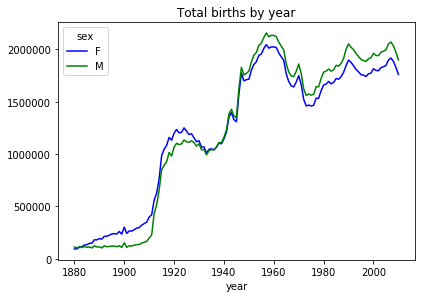

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
ax = total_births.plot(title='Total births by year') 
#plt.show()

In [ ]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


## Alternative plotting script

The above graph is great and often what we want is just to take a quick look at the relationships in the data, and a data frame plot will do exactly the right thing with no customization.  It's helpful to know that `pandas` is using a Python package called `matplotlib` to draw the graph above, and we can do the same ourselves, with a lot more lines of code, but also with alot more customization.

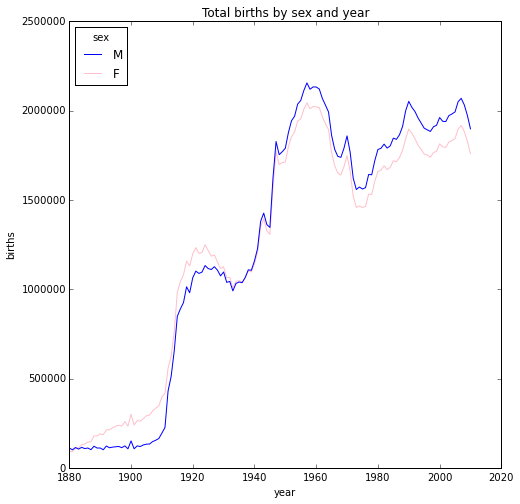

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.9,left=0.2)
ax1.set_ylabel('births')

ax1.set_xlabel('year')
(p1,) = ax1.plot(total_births.index,total_births.F,color='pink',label='F')
(p2, ) = ax1.plot(total_births.index,total_births.M,color='blue',label='M')
ax1.set_title('Total births by sex and year')
    
ax1.legend((p2,p1),('M','F'),loc='upper left',title='sex')
plt.show()

In [ ]:
pd.display

AttributeError: ignored

In [ ]:
# The usual preamble
import pandas as pd
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

# 2.1 What's even in it? (the summary)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [ ]:
import os.path
print(os.getcwd())
## Assuming data is in a directory called '/Users/gawron/ext/src/sphinx/python_for_ss/data'
data_path = '/Users/gawron/ext/src/sphinx/python_for_ss/ipython_notebooks'
os.chdir(data_path)
print(os.getcwd())      

/Users/gawron/ext/src/sphinx/python_for_ss/ipython_notebooks/pandas
/Users/gawron/ext/src/sphinx/python_for_ss/ipython_notebooks


In [ ]:
import pandas as pd
complaints = pd.read_csv('311-service-requests.csv',low_memory=False)

In [ ]:
type(complaints)

pandas.core.frame.DataFrame

When you look at a large dataframe, instead of showing you the contents of the dataframe, it'll show you a *summary*. This includes all the columns, and how many non-null values there are in each column.

In [ ]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948,212540,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unsp

# 2.2 Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [ ]:
complaints['Complaint Type']

0      Noise - Street/Sidewalk
1              Illegal Parking
2           Noise - Commercial
3              Noise - Vehicle
4                       Rodent
5           Noise - Commercial
6             Blocked Driveway
7           Noise - Commercial
8           Noise - Commercial
9           Noise - Commercial
10    Noise - House of Worship
11          Noise - Commercial
12             Illegal Parking
13             Noise - Vehicle
14                      Rodent
...
111054    Noise - Street/Sidewalk
111055         Noise - Commercial
111056      Street Sign - Missing
111057                      Noise
111058         Noise - Commercial
111059    Noise - Street/Sidewalk
111060                      Noise
111061         Noise - Commercial
111062               Water System
111063               Water System
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type,

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [ ]:
il_ser = complaints['Complaint Type'] == 'Illegal Parking'
il_ser[:10]

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Complaint Type, dtype: bool

In [ ]:
nypd_df = complaints[complaints['Agency'] == 'NYPD']

In [ ]:
(complaints['Agency'] == 'NYPD')[:10]

0     True
1     True
2     True
3     True
4    False
5     True
6     True
7     True
8     True
9     True
Name: Agency, dtype: bool

In [ ]:
il_df = complaints[(complaints['Agency'] == 'NYPD') &  (complaints['Complaint Type'] == 'Illegal Parking')]

In [ ]:
(len(il_df), len(nypd_df))

(3343, 15295)

In [ ]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,N/A,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


We can combine these to get the first 5 rows of a column:

In [ ]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [ ]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

If the column name has no spaces in it, the following syntax will also work
for accesing a column's contents:

In [ ]:
complaints.Descriptor

0                       Loud Talking
1       Commercial Overnight Parking
2                   Loud Music/Party
3                     Car/Truck Horn
4       Condition Attracting Rodents
5                   Banging/Pounding
6                          No Access
7                   Loud Music/Party
8                       Loud Talking
9                   Loud Music/Party
10                  Loud Music/Party
11                  Loud Music/Party
12    Double Parked Blocking Vehicle
13                     Engine Idling
14                      Rat Sighting
...
111054                                    Loud Talking
111055                                    Loud Talking
111056                                        Bus Stop
111057                     Noise: Jack Hammering (NC2)
111058                                Loud Music/Party
111059                                    Loud Talking
111060    Noise: Construction Before/After Hours (NM1)
111061                                Loud Music/Party
1

But note that doesnt work for the column name `Complaint Type`, because it has a space.  So the square bracket syntax is the one to remember.

In [ ]:
complaints.Complaint Type

SyntaxError: invalid syntax (<ipython-input-13-eaacfb36a606>, line 1)

## Selecting rows that meet a condition

The following produces a new `DataFrame` that contains only the rows with complaints whose `Agency` column is filled with the value 'NYPD'.  We talked a bit more in detail about the pieces of this kind of  complex expression in the section entitled *Selection: Selecting parts of Pandas data frames*.

In [ ]:
complaints[complaints['Agency'] == 'NYPD']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"
10,26595176,10/31/2013 01:25:12 AM,NaN,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11218,3775 18 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634378,-73.969462,"(40.63437840816299, -73.96946177104543)"


# 2.3 Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [ ]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


The following variant is error!

In [ ]:
complaints[['Complaint Type'],['Borough']]

TypeError: unhashable type: 'list'

```
complaints[['Complaint Type', 'Borough']]
```

shows us a summary of a `DataFrame`; we can choose instead to look at the first 10 rows:

In [ ]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 2.4 What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [ ]:
complaints['Value Row'] = 1

In [ ]:
complaints['Value Row'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Value Row, dtype: int64

In [ ]:
#df = df[df.column.isin(value_list)]
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]
pt0 = pt00.pivot_table('Value Row', 'Agency' , columns = 'Complaint Type',aggfunc=sum)

In [ ]:
pt0[:10]

Complaint Type,Agency Issues,Animal Abuse,Bike Rack Condition,Bike/Roller/Skate Chronic,Blocked Driveway,Bridge Condition,Broken Muni Meter,Bus Stop Shelter Placement,Compliment,Curb Condition,...,Street Condition,Street Light Condition,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Traffic,Traffic Signal Condition,Tunnel Condition,Urinating in Public,Vending
Agency,,,,,,,,,,,,,,,,,,,,,
DOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOT,20.0,NaN,7.0,NaN,NaN,20.0,2070.0,14.0,1.0,66.0,...,3473.0,7117.0,691.0,110.0,327.0,NaN,3145.0,1.0,NaN,NaN
NYPD,NaN,164.0,NaN,32.0,4590.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,168.0,NaN,NaN,30.0,229.0


In [ ]:
complaints['Complaint Type'].value_counts()

HEATING                     14200
GENERAL CONSTRUCTION         7471
Street Light Condition       7117
DOF Literature Request       5797
PLUMBING                     5373
PAINT - PLASTER              5149
Blocked Driveway             4590
NONCONST                     3998
Street Condition             3473
Illegal Parking              3343
Noise                        3321
Traffic Signal Condition     3145
Dirty Conditions             2653
Water System                 2636
Noise - Commercial           2578
...
Opinion for the Mayor                2
Window Guard                         2
DFTA Literature Request              2
Legal Services Provider Complaint    2
Open Flame Permit                    1
Snow                                 1
Municipal Parking Facility           1
X-Ray Machine/Equipment              1
Stalled Sites                        1
DHS Income Savings Requirement       1
Tunnel Condition                     1
Highway Sign - Damaged               1
Ferry Permit      

If we just wanted the top 10 most common complaints, we can do this:

In [ ]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

But it gets better! This is a  Series, so we can plot them!

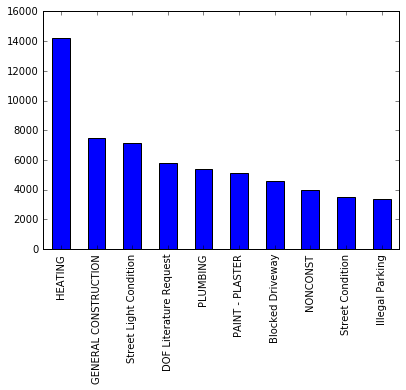

In [ ]:
%matplotlib inline
complaint_counts[:10].plot(kind='bar')

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  